### 1. Setup Awal
Langkah pertama adalah menyiapkan lingkungan kerja. Ini termasuk mengimpor library yang diperlukan dan mendefinisikan fungsi untuk menyimpan gambar plot.

In [50]:
# Diperlukan Python versi 3.5 atau lebih tinggi
import sys
assert sys.version_info >= (3, 5)

# Diperlukan Scikit-Learn versi 0.20 atau lebih tinggi
import sklearn
assert sklearn.__version__ >= "0.20"

# Impor library umum
import numpy as np
import os

# Untuk membuat output notebook ini stabil di setiap proses run
np.random.seed(42)

# Untuk mem-plot gambar yang bagus
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Direktori untuk menyimpan gambar
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# Fungsi untuk menyimpan gambar
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Menyimpan gambar", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### 2. Regresi Linier
Bagian ini menunjukkan cara melatih model Regresi Linier menggunakan dua metode: Normal Equation dan Gradient Descent.

#### 2.1. The Normal Equation
Normal Equation adalah formula matematis yang dapat menemukan nilai parameter (theta) optimal secara langsung tanpa proses iterasi.

Theta terbaik yang dihitung: [[4.21509616]
 [2.77011339]]
Prediksi: [[4.21509616]
 [9.75532293]]


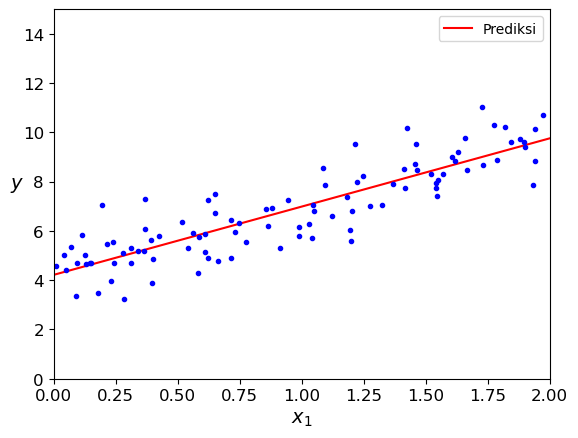

In [51]:
# Membuat data buatan yang terlihat linier
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # y = 4 + 3x + noise

# Menambahkan x0 = 1 pada setiap instance (untuk bias term)
X_b = np.c_[np.ones((100, 1)), X]

# Menghitung theta_best menggunakan Normal Equation
# theta = (X^T * X)^-1 * X^T * y
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("Theta terbaik yang dihitung:", theta_best)

# Melakukan prediksi pada data baru
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # Tambahkan x0 = 1
y_predict = X_new_b.dot(theta_best)
print("Prediksi:", y_predict)

# Visualisasi data dan garis prediksi
plt.plot(X_new, y_predict, "r-", label="Prediksi")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

##### Menggunakan Scikit-Learn
Cara yang lebih mudah adalah dengan menggunakan kelas LinearRegression dari Scikit-Learn. Scikit-Learn menyederhanakan proses. lin_reg.fit(X, y) melatih model, dan hasilnya (intercept dan koefisien) sangat mirip dengan yang dihitung menggunakan Normal Equation.

In [52]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("Intercept dan Koefisien dari Scikit-Learn:", lin_reg.intercept_, lin_reg.coef_)
print("Prediksi dari Scikit-Learn:", lin_reg.predict(X_new))

Intercept dan Koefisien dari Scikit-Learn: [4.21509616] [[2.77011339]]
Prediksi dari Scikit-Learn: [[4.21509616]
 [9.75532293]]


#### 2.2. Gradient Descent
Gradient Descent adalah algoritma optimisasi yang bekerja secara iteratif untuk menemukan parameter optimal dengan cara meminimalkan fungsi biaya (cost function). Ada tiga varian utama: Batch, Stochastic, dan Mini-batch.

##### Batch Gradient Descent (BGD)
BGD menghitung gradien dari fungsi biaya berdasarkan seluruh data latihan pada setiap langkah iterasi.

In [53]:
eta = 0.1  # Learning rate (laju pembelajaran)
n_iterations = 1000
m = 100 # Jumlah instance

theta_bgd = np.random.randn(2,1)  # Inisialisasi theta secara acak
theta_history_bgd = []

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta_bgd) - y)
    theta_bgd = theta_bgd - eta * gradients
    if iteration % 100 == 0:  # Simpan setiap 100 iterasi
        theta_history_bgd.append(theta_bgd.copy())

print("Theta dari BGD:", theta_bgd)

Theta dari BGD: [[4.21509616]
 [2.77011339]]


##### Stochastic Gradient Descent (SGD)
SGD memperbarui parameter menggunakan satu instance data acak pada setiap langkah. Ini membuatnya lebih cepat tetapi kurang stabil dibandingkan BGD.

In [54]:
n_epochs = 50
t0, t1 = 5, 50  # Hyperparameter untuk learning schedule

def learning_schedule(t):
    return t0 / (t + t1)

theta_sgd = np.random.randn(2,1)  # Inisialisasi acak
theta_history_sgd = []

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta_sgd) - yi)
        eta = learning_schedule(epoch * m + i)
        theta_sgd = theta_sgd - eta * gradients
    if epoch % 10 == 0:  # Simpan setiap 10 epoch
        theta_history_sgd.append(theta_sgd.copy())

print("Theta dari SGD:", theta_sgd)

Theta dari SGD: [[4.18475289]
 [2.73036719]]


##### Mini-batch Gradient Descent
Ini adalah kompromi antara BGD dan SGD. Pada setiap langkah, ia menghitung gradien berdasarkan sekelompok kecil data acak yang disebut mini-batch.

In [55]:
n_iterations = 50
minibatch_size = 20
t = 0

theta_mbgd = np.random.randn(2,1)
theta_history_mbgd = []

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta_mbgd) - yi)
        eta = learning_schedule(t)
        theta_mbgd = theta_mbgd - eta * gradients
    if epoch % 10 == 0:  # Simpan setiap 10 epoch
        theta_history_mbgd.append(theta_mbgd.copy())

print("Theta dari Mini-batch GD:", theta_mbgd)

Theta dari Mini-batch GD: [[4.16581072]
 [2.81109934]]


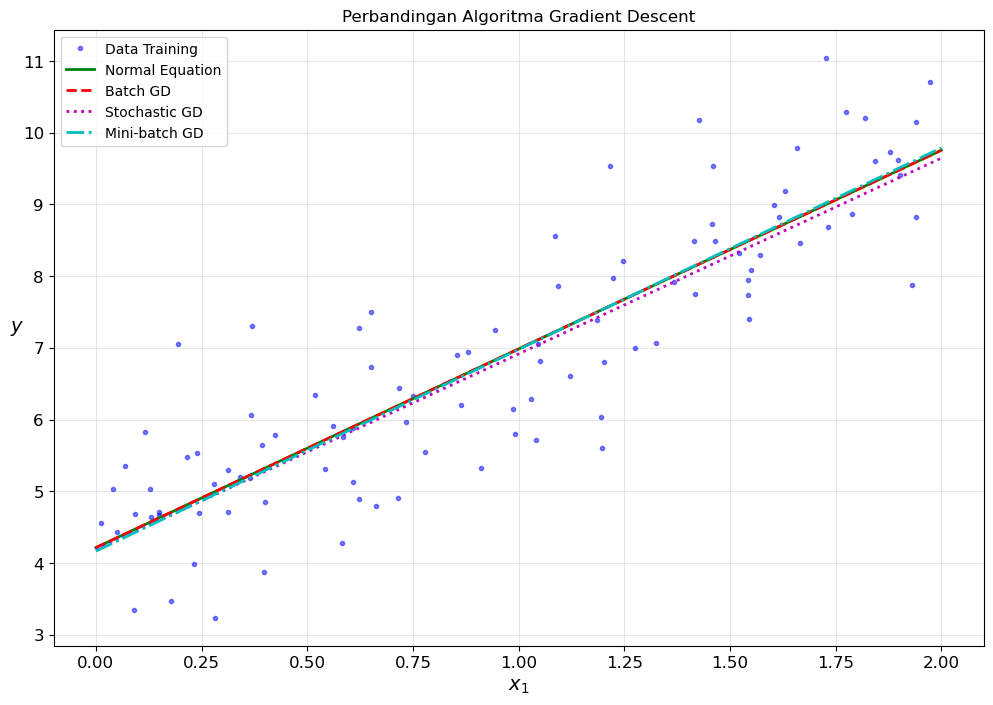

In [56]:
# Plot perbandingan hasil dari berbagai algoritma
plt.figure(figsize=(12, 8))
X_plot = np.linspace(0, 2, 100).reshape(-1, 1)
X_plot_b = np.c_[np.ones((100, 1)), X_plot]

plt.plot(X, y, "b.", alpha=0.5, label="Data Training")
plt.plot(X_plot, X_plot_b.dot(theta_best), "g-", linewidth=2, label="Normal Equation")
plt.plot(X_plot, X_plot_b.dot(theta_bgd), "r--", linewidth=2, label="Batch GD")
plt.plot(X_plot, X_plot_b.dot(theta_sgd), "m:", linewidth=2, label="Stochastic GD")
plt.plot(X_plot, X_plot_b.dot(theta_mbgd), "c-.", linewidth=2, label="Mini-batch GD")

plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend()
plt.title("Perbandingan Algoritma Gradient Descent")
plt.grid(True, alpha=0.3)
plt.show()

### 3. Regresi Polinomial
Regresi Polinomial digunakan ketika data memiliki hubungan non-linier. Caranya adalah dengan menambahkan fitur pangkat dari fitur yang ada, lalu melatih model linier pada data yang telah ditransformasi ini.

Fitur Asli: [0.93707422]
Fitur Setelah Transformasi: [0.93707422 0.87810809]
Intercept dan Koefisien: [1.97449026] [[0.97553626 0.50284469]]


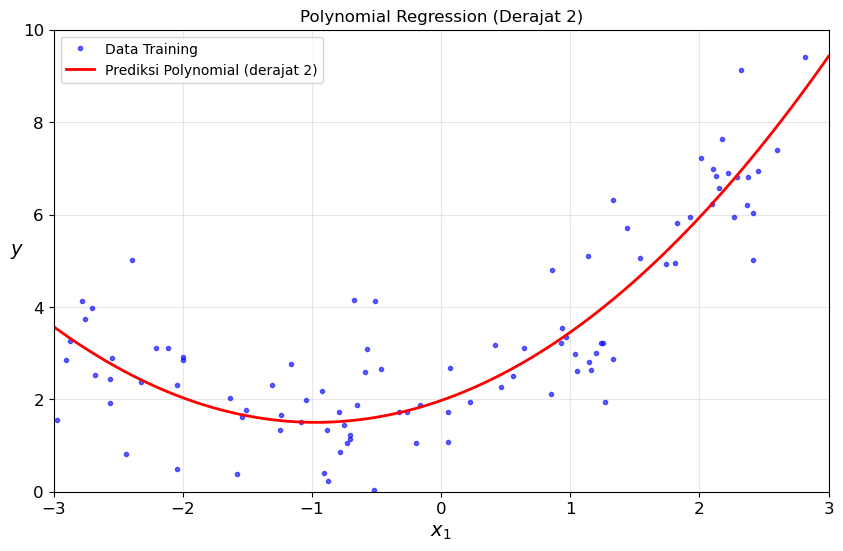

In [57]:
# Membuat data kuadratik
m = 100
X_poly_data = 6 * np.random.rand(m, 1) - 3
y_poly_data = 0.5 * X_poly_data**2 + X_poly_data + 2 + np.random.randn(m, 1) # y = 0.5x^2 + x + 2 + noise

# Menggunakan PolynomialFeatures dari Scikit-Learn
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_poly_data)

print("Fitur Asli:", X_poly_data[0])
print("Fitur Setelah Transformasi:", X_poly[0])

# Melatih model LinearRegression pada data yang ditransformasi
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y_poly_data)
print("Intercept dan Koefisien:", lin_reg_poly.intercept_, lin_reg_poly.coef_)

# Visualisasi
X_new_poly = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly_features = poly_features.transform(X_new_poly)
y_new_poly = lin_reg_poly.predict(X_new_poly_features)

plt.figure(figsize=(10, 6))
plt.plot(X_poly_data, y_poly_data, "b.", alpha=0.6, label="Data Training")
plt.plot(X_new_poly, y_new_poly, "r-", linewidth=2, label="Prediksi Polynomial (derajat 2)")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend()
plt.title("Polynomial Regression (Derajat 2)")
plt.axis([-3, 3, 0, 10])
plt.grid(True, alpha=0.3)
plt.show()

### 4. Learning Curves
Learning curves adalah plot yang menunjukkan performa model pada set pelatihan dan validasi sebagai fungsi dari ukuran set pelatihan. Ini berguna untuk mendiagnosis apakah model mengalami underfitting atau overfitting.

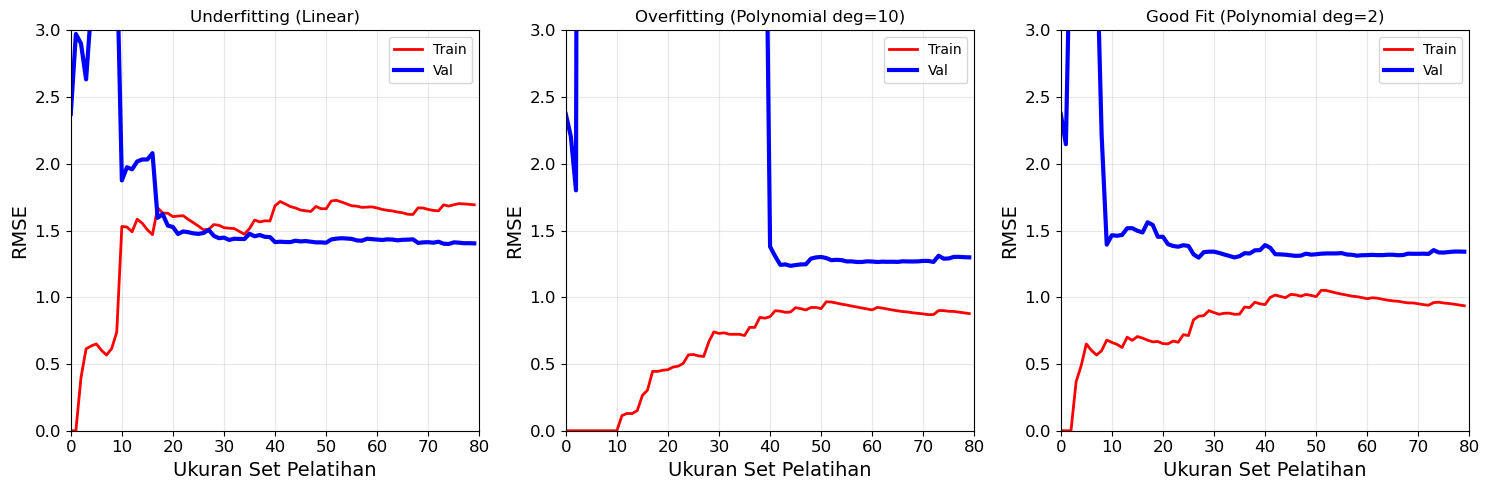

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-", linewidth=2, label="Train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Val")
    plt.legend(loc="upper right")
    plt.xlabel("Ukuran Set Pelatihan")
    plt.ylabel("RMSE")

# Kurva untuk model linier (underfitting)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X_poly_data, y_poly_data)
plt.axis([0, 80, 0, 3])
plt.title("Underfitting (Linear)")
plt.grid(True, alpha=0.3)

# Kurva untuk model polinomial derajat 10 (overfitting)
plt.subplot(1, 3, 2)
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X_poly_data, y_poly_data)
plt.axis([0, 80, 0, 3])
plt.title("Overfitting (Polynomial deg=10)")
plt.grid(True, alpha=0.3)

# Kurva untuk model polinomial derajat 2 (good fit)
plt.subplot(1, 3, 3)
polynomial_regression_2 = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression_2, X_poly_data, y_poly_data)
plt.axis([0, 80, 0, 3])
plt.title("Good Fit (Polynomial deg=2)")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 5. Model Linier dengan Regularisasi
Regularisasi adalah teknik untuk mengurangi overfitting dengan cara membatasi kompleksitas model.

#### 5.1. Ridge Regression (L2 Regularization)
Ridge Regression menambahkan penalty term (L2 norm) ke fungsi biaya. Hyperparameter alpha mengontrol seberapa besar penalty yang diberikan.

In [59]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor

# Membuat data baru
np.random.seed(42)
m = 20
X_reg = 3 * np.random.rand(m, 1)
y_reg = 1 + 0.5 * X_reg + np.random.randn(m, 1) / 1.5

# Melatih model Ridge dengan alpha=1
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_reg, y_reg)
print("Prediksi Ridge:", ridge_reg.predict([[1.5]]))

# Ridge juga dapat diimplementasikan dengan SGD
sgd_reg = SGDRegressor(penalty="l2") # 'l2' menandakan penalty Ridge
sgd_reg.fit(X_reg, y_reg.ravel())
print("Prediksi Ridge (via SGD):", sgd_reg.predict([[1.5]]))

Prediksi Ridge: [1.55071465]
Prediksi Ridge (via SGD): [1.46619232]


#### 5.2. Lasso Regression (L1 Regularization)
Lasso Regression menggunakan penalty term L1 norm. Keunikan Lasso adalah kemampuannya untuk menyingkirkan fitur yang tidak penting (membuat bobotnya menjadi nol).

In [60]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_reg, y_reg)
print("Prediksi Lasso:", lasso_reg.predict([[1.5]]))

Prediksi Lasso: [1.53788174]


#### 5.3. Elastic Net
Elastic Net adalah gabungan dari Ridge dan Lasso. Ia mengontrol campuran keduanya dengan hyperparameter l1_ratio.

In [61]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) # l1_ratio=0.5 berarti 50% Lasso, 50% Ridge
elastic_net.fit(X_reg, y_reg)
print("Prediksi Elastic Net:", elastic_net.predict([[1.5]]))

Prediksi Elastic Net: [1.54333232]


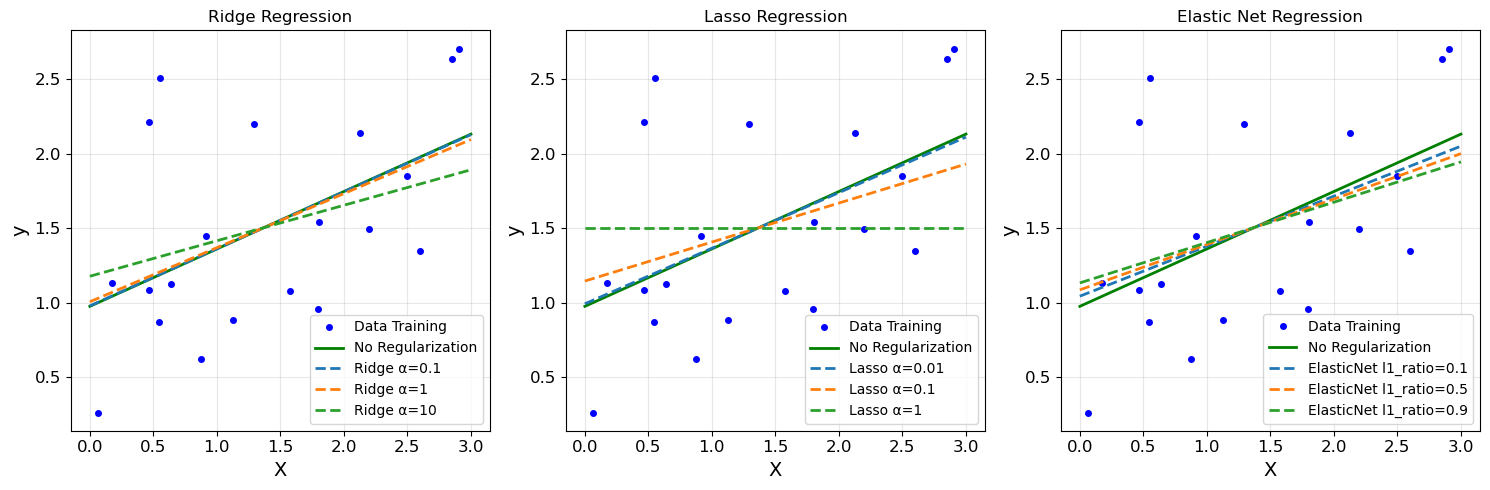

In [62]:
# Visualisasi perbandingan regularization
plt.figure(figsize=(15, 5))

# Generate data untuk plotting
X_plot_reg = np.linspace(0, 3, 300).reshape(-1, 1)

# Linear Regression tanpa regularization
lin_reg_no_reg = LinearRegression()
lin_reg_no_reg.fit(X_reg, y_reg)
y_pred_no_reg = lin_reg_no_reg.predict(X_plot_reg)

# Ridge dengan berbagai alpha
ridge_alphas = [0.1, 1, 10]
y_pred_ridge = []
for alpha in ridge_alphas:
    ridge = Ridge(alpha=alpha, random_state=42)
    ridge.fit(X_reg, y_reg)
    y_pred_ridge.append(ridge.predict(X_plot_reg))

plt.subplot(1, 3, 1)
plt.plot(X_reg, y_reg, "b.", markersize=8, label="Data Training")
plt.plot(X_plot_reg, y_pred_no_reg, "g-", linewidth=2, label="No Regularization")
for i, alpha in enumerate(ridge_alphas):
    plt.plot(X_plot_reg, y_pred_ridge[i], "--", linewidth=2, label=f"Ridge α={alpha}")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Ridge Regression")
plt.legend()
plt.grid(True, alpha=0.3)

# Lasso dengan berbagai alpha
lasso_alphas = [0.01, 0.1, 1]
y_pred_lasso = []
for alpha in lasso_alphas:
    lasso = Lasso(alpha=alpha, random_state=42)
    lasso.fit(X_reg, y_reg)
    y_pred_lasso.append(lasso.predict(X_plot_reg))

plt.subplot(1, 3, 2)
plt.plot(X_reg, y_reg, "b.", markersize=8, label="Data Training")
plt.plot(X_plot_reg, y_pred_no_reg, "g-", linewidth=2, label="No Regularization")
for i, alpha in enumerate(lasso_alphas):
    plt.plot(X_plot_reg, y_pred_lasso[i], "--", linewidth=2, label=f"Lasso α={alpha}")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Lasso Regression")
plt.legend()
plt.grid(True, alpha=0.3)

# Elastic Net dengan berbagai l1_ratio
elastic_ratios = [0.1, 0.5, 0.9]
y_pred_elastic = []
for ratio in elastic_ratios:
    elastic = ElasticNet(alpha=0.1, l1_ratio=ratio, random_state=42)
    elastic.fit(X_reg, y_reg)
    y_pred_elastic.append(elastic.predict(X_plot_reg))

plt.subplot(1, 3, 3)
plt.plot(X_reg, y_reg, "b.", markersize=8, label="Data Training")
plt.plot(X_plot_reg, y_pred_no_reg, "g-", linewidth=2, label="No Regularization")
for i, ratio in enumerate(elastic_ratios):
    plt.plot(X_plot_reg, y_pred_elastic[i], "--", linewidth=2, label=f"ElasticNet l1_ratio={ratio}")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Elastic Net Regression")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### 5.4. Early Stopping
Early stopping adalah metode regularisasi lain di mana pelatihan dihentikan ketika performa model pada set validasi mulai memburuk.

Epoch terbaik: 999
Minimum validation error: 0.8701067395203667


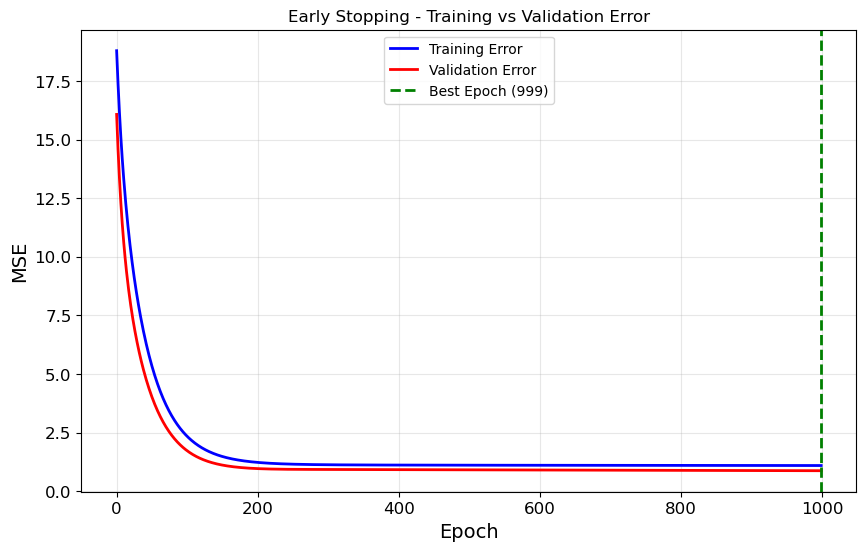

In [65]:
from sklearn.preprocessing import StandardScaler
from copy import deepcopy

# Membagi data
X_train, X_val, y_train, y_val = train_test_split(X_poly_data[:50], y_poly_data[:50].ravel(), test_size=0.5, random_state=10)

# Pipeline untuk transformasi
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
train_errors, val_errors = [], []

# Loop pelatihan dengan early stopping
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    
    train_error = mean_squared_error(y_train, y_train_predict)
    val_error = mean_squared_error(y_val, y_val_predict)
    
    train_errors.append(train_error)
    val_errors.append(val_error)
    
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

print("Epoch terbaik:", best_epoch)
print("Minimum validation error:", minimum_val_error)

# Plot learning curve dengan early stopping
plt.figure(figsize=(10, 6))
plt.plot(train_errors, "b-", linewidth=2, label="Training Error")
plt.plot(val_errors, "r-", linewidth=2, label="Validation Error")
plt.axvline(x=best_epoch, color='g', linestyle='--', linewidth=2, label=f'Best Epoch ({best_epoch})')
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Early Stopping - Training vs Validation Error")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 6. Regresi Logistik & Softmax
Bagian ini beralih ke model klasifikasi.

#### 6.1. Regresi Logistik (untuk Klasifikasi Biner)
Regresi Logistik digunakan untuk memprediksi probabilitas sebuah instance termasuk dalam kelas tertentu.

Batas Keputusan: [1.66066066]


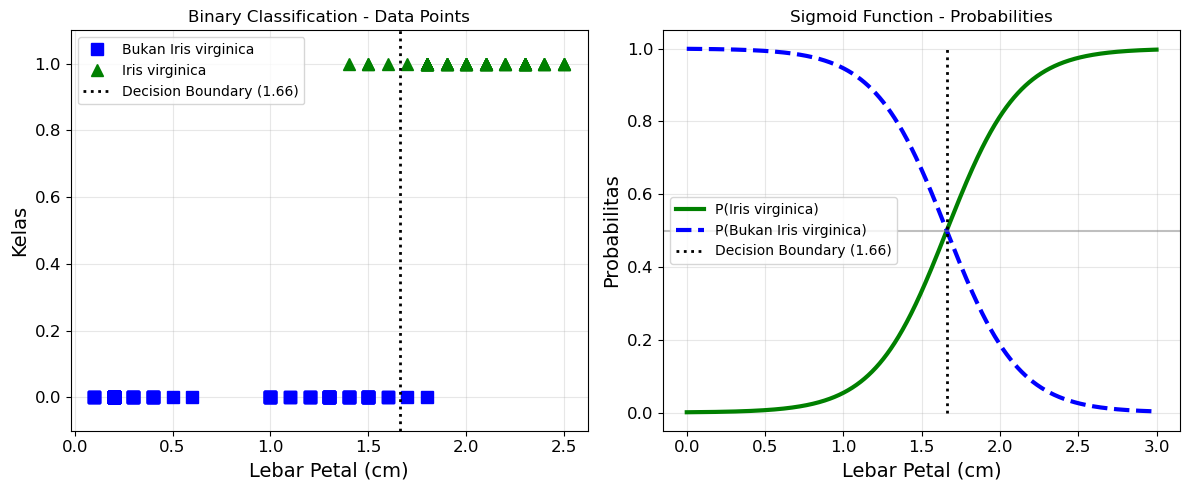

Prediksi untuk petal width 1.7cm dan 1.5cm: [1 0]
Probabilitas untuk petal width 1.7cm: [[0.45713982 0.54286018]]


In [66]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# Memuat dataset Iris
iris = datasets.load_iris()
X_iris = iris["data"][:, 3:]  # Fitur: petal width
y_iris = (iris["target"] == 2).astype(np.int64)  # Target: 1 jika Iris virginica, 0 jika bukan

# Melatih model Regresi Logistik
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X_iris, y_iris)

# Membuat data baru untuk plot
X_new_iris = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new_iris)

# Menemukan decision boundary
decision_boundary = X_new_iris[y_proba[:, 1] >= 0.5][0]
print("Batas Keputusan:", decision_boundary)

# Visualisasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(X_iris[y_iris==0], y_iris[y_iris==0], "bs", markersize=8, label="Bukan Iris virginica")
plt.plot(X_iris[y_iris==1], y_iris[y_iris==1], "g^", markersize=8, label="Iris virginica")
plt.plot([decision_boundary, decision_boundary], [-0.1, 1.1], "k:", linewidth=2, label=f'Decision Boundary ({decision_boundary[0]:.2f})')
plt.xlabel("Lebar Petal (cm)")
plt.ylabel("Kelas")
plt.title("Binary Classification - Data Points")
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-0.1, 1.1)

plt.subplot(1, 2, 2)
plt.plot(X_new_iris, y_proba[:, 1], "g-", linewidth=3, label="P(Iris virginica)")
plt.plot(X_new_iris, y_proba[:, 0], "b--", linewidth=3, label="P(Bukan Iris virginica)")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2, label=f'Decision Boundary ({decision_boundary[0]:.2f})')
plt.axhline(y=0.5, color='gray', linestyle='-', alpha=0.5)
plt.xlabel("Lebar Petal (cm)")
plt.ylabel("Probabilitas")
plt.title("Sigmoid Function - Probabilities")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Prediksi pada data baru
print("Prediksi untuk petal width 1.7cm dan 1.5cm:", log_reg.predict([[1.7], [1.5]]))
print("Probabilitas untuk petal width 1.7cm:", log_reg.predict_proba([[1.7]]))

#### 6.2. Regresi Softmax (untuk Klasifikasi Multikelas)
Regresi Softmax adalah generalisasi dari Regresi Logistik yang mendukung lebih dari dua kelas secara langsung.

/home/ardi/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Prediksi untuk (petal length=5, petal width=2): [2]
Probabilitas untuk setiap kelas: [[6.21626371e-07 5.73689802e-02 9.42630398e-01]]


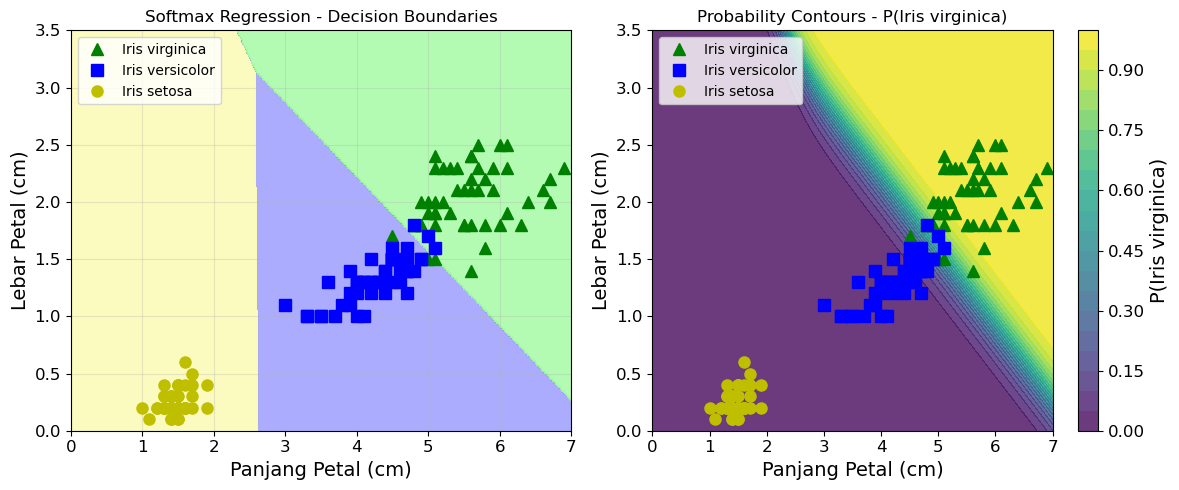

In [67]:
# Menggunakan dua fitur: petal length dan petal width
X_iris_multi = iris["data"][:, (2, 3)]
y_iris_multi = iris["target"] # Tiga kelas: 0 (Setosa), 1 (Versicolor), 2 (Virginica)

# Melatih model Softmax
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X_iris_multi, y_iris_multi)

# Prediksi untuk data baru
print("Prediksi untuk (petal length=5, petal width=2):", softmax_reg.predict([[5, 2]]))
print("Probabilitas untuk setiap kelas:", softmax_reg.predict_proba([[5, 2]]))

# Visualisasi decision boundaries
plt.figure(figsize=(12, 5))

# Plot 1: Data points dengan decision boundaries
plt.subplot(1, 2, 1)
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1),
)
X_new_multi = np.c_[x0.ravel(), x1.ravel()]
y_predict_multi = softmax_reg.predict(X_new_multi)
zz = y_predict_multi.reshape(x0.shape)

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap, alpha=0.8)

plt.plot(X_iris_multi[y_iris_multi==2, 0], X_iris_multi[y_iris_multi==2, 1], "g^", markersize=8, label="Iris virginica")
plt.plot(X_iris_multi[y_iris_multi==1, 0], X_iris_multi[y_iris_multi==1, 1], "bs", markersize=8, label="Iris versicolor")
plt.plot(X_iris_multi[y_iris_multi==0, 0], X_iris_multi[y_iris_multi==0, 1], "yo", markersize=8, label="Iris setosa")

plt.xlabel("Panjang Petal (cm)")
plt.ylabel("Lebar Petal (cm)")
plt.title("Softmax Regression - Decision Boundaries")
plt.legend(loc="upper left")
plt.axis([0, 7, 0, 3.5])
plt.grid(True, alpha=0.3)

# Plot 2: Probability contours untuk satu kelas
plt.subplot(1, 2, 2)
y_proba_multi = softmax_reg.predict_proba(X_new_multi)
zz_proba = y_proba_multi[:, 2].reshape(x0.shape)  # Probabilitas untuk kelas Virginica

contour = plt.contourf(x0, x1, zz_proba, levels=20, cmap='viridis', alpha=0.8)
plt.colorbar(contour, label='P(Iris virginica)')

plt.plot(X_iris_multi[y_iris_multi==2, 0], X_iris_multi[y_iris_multi==2, 1], "g^", markersize=8, label="Iris virginica")
plt.plot(X_iris_multi[y_iris_multi==1, 0], X_iris_multi[y_iris_multi==1, 1], "bs", markersize=8, label="Iris versicolor")
plt.plot(X_iris_multi[y_iris_multi==0, 0], X_iris_multi[y_iris_multi==0, 1], "yo", markersize=8, label="Iris setosa")

plt.xlabel("Panjang Petal (cm)")
plt.ylabel("Lebar Petal (cm)")
plt.title("Probability Contours - P(Iris virginica)")
plt.legend(loc="upper left")
plt.axis([0, 7, 0, 3.5])

plt.tight_layout()
plt.show()

In [69]:
# Tabel perbandingan parameter yang ditemukan
import pandas as pd

results_df = pd.DataFrame({
    'Method': ['Normal Equation', 'Scikit-Learn', 'Batch GD', 'Stochastic GD', 'Mini-batch GD'],
    'Intercept': [theta_best[0,0], lin_reg.intercept_[0], theta_bgd[0,0], theta_sgd[0,0], theta_mbgd[0,0]],
    'Slope': [theta_best[1,0], lin_reg.coef_[0,0], theta_bgd[1,0], theta_sgd[1,0], theta_mbgd[1,0]]
})

print(results_df.round(4))

            Method  Intercept   Slope
0  Normal Equation     4.2151  2.7701
1     Scikit-Learn     3.4212  0.8775
2         Batch GD     4.2151  2.7701
3    Stochastic GD     4.1848  2.7304
4    Mini-batch GD     4.1658  2.8111


---

# Kesimpulan
Berikut adalah beberapa kesimpulan penting mengenai performa dan karakteristik model klasifikasi yang berbeda.

## 1. Klasifikasi Biner ("Angka 5" vs "Bukan 5")

### Akurasi Bukan Metrik Terbaik
- Akurasi awal **SGDClassifier** sangat tinggi (~95.7%). 
- Namun, bahkan classifier sederhana yang selalu menebak "bukan 5" dapat mencapai akurasi ~91%, menunjukkan perlunya metrik lain untuk dataset yang tidak seimbang.

### Precision vs. Recall
- **SGDClassifier** memiliki precision ~83.7% namun recall hanya ~65.1%.
- Model ini cukup akurat dalam menebak angka 5, tetapi masih melewatkan sekitar 35% dari semua angka 5 yang ada, menunjukkan adanya trade-off antara kedua metrik.

### ROC Curve dan Performa Model
- Kurva **ROC** untuk **SGDClassifier** menunjukkan performa baik dengan skor AUC = 0.9605, jauh lebih baik dari tebakan acak (AUC = 0.5).
- **RandomForestClassifier** jauh lebih unggul dengan skor AUC mencapai **0.9983**, dan kurva ROC-nya lebih dekat ke sudut kiri atas, menunjukkan performa superior.
- Perbandingan precision dan recall:
  - **SGDClassifier**: precision **0.837**, recall **0.651**.
  - **RandomForestClassifier**: precision **0.991**, recall **0.866**.

**Kesimpulan Biner**: Untuk tugas klasifikasi biner ini, **Random Forest adalah model yang jauh lebih baik daripada SGD**.

---

## 2. Klasifikasi Multikelas (Semua Digit)

### Pentingnya Scaling Fitur
- **SGDClassifier** awalnya memiliki akurasi ~86.7%.
- Setelah dilakukan **scaling** pada fitur menggunakan **StandardScaler**, akurasinya meningkat menjadi **89.7%**.
- **Kesimpulan**: Penskalaan fitur sangat penting untuk meningkatkan performa model berbasis gradien.

### Analisis Kesalahan
- **Confusion matrix** yang dinormalisasi menunjukkan kelemahan spesifik model.
- **Kesalahan terbesar**: digit **5** sering diklasifikasikan sebagai **8**, dengan tingkat kesalahan sekitar **9.9%**.
- Analisis ini sangat berguna untuk iterasi perbaikan model selanjutnya.

---

## 3. Klasifikasi Multilabel & Multioutput

### Klasifikasi Multilabel (KNN)
- **KNeighborsClassifier** dilatih untuk memprediksi dua label sekaligus:
  - Apakah digit "Besar"?
  - Apakah digit "Ganjil"?
- Model ini mencapai **Macro F1-Score sebesar 0.976**, menunjukkan performa sangat tinggi pada kedua tugas tersebut.
- **Visualisasi prediksi** mengonfirmasi keakuratannya.

### Klasifikasi Multioutput (KNN Denoising)
- **Tugas paling kompleks**: model harus **"membersihkan"** gambar digit yang terdistorsi.
- **Plot perbandingan** antara **"Input Ber-noise"** dan **"Hasil Cleaning"** menunjukkan bahwa model **KNN sangat berhasil menghilangkan noise dan merekonstruksi gambar asli**.
- **Metrik**:
  - **Mean Squared Error** rendah.
  - **Akurasi pixel-wise tinggi (~90.5%)** mengonfirmasi keberhasilan model secara kuantitatif.

---

### **Kesimpulan Akhir**
- Untuk **klasifikasi biner**, **Random Forest** jauh lebih baik daripada **SGDClassifier**.
- **Scaling fitur** sangat membantu meningkatkan performa klasifikasi multikelas.
- **KNN** sangat efektif dalam **multilabel classification** dan **image denoising**.

---

### **Model terbaik berdasarkan analisis:** 
1. **RandomForestClassifier** untuk klasifikasi biner.
2. **SGDClassifier dengan scaling** untuk klasifikasi multikelas.
3. **KNeighborsClassifier** untuk multilabel dan multioutput classification.